## Glass Identification Using Machine Learning

### 1.0 Problem

### 1.1 Definition
The goal of this project is to develop a machine learning model for glass classification that can accurately predict the type of glass based on its attributes. The dataset's target feature represents the following glass types:

- 1: Building windows (float processed)
- 2: Building windows (non-float processed)
- 3: Vehicle windows (float processed)
- 4: Vehicle windows (non-float processed) *(not present in this dataset)*
- 5: Containers
- 6: Tableware
- 7: Headlamps

### 1.2 Why is it worth solving?
Accurately predicting glass types is crucial for industries that rely on selecting the appropriate glass for specific applications. By leveraging a machine learning model, workers and manufacturers can efficiently identify the correct glass type, reducing errors and improving productivity. This model can serve as a valuable tool for ensuring the right glass is used for the right purpose.

The glass identification dataset contains 10 attributes (including an ID column), with the target feature being the glass type, which is a discrete variable with 7 possible values. For this study, the target class will be represented as integers.

In [1]:
#Import libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Get the raw data.
my_file="glass.csv"
df=pd.read_csv(my_file, encoding='utf-8')

In [3]:
#Get first five rows of data set.
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Get the shape of glass data.
df.shape

(214, 10)

In [5]:
#Check data types.
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
#Check data attributes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
#Get descriptive statistics of the dataset.
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
#Get dependent variable values.
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

### 2.0 Data Visualization

To see the data distribution, get the visualizations for the predictor variables and bin each predictor with nine containers.

<AxesSubplot:xlabel='RI', ylabel='Count'>

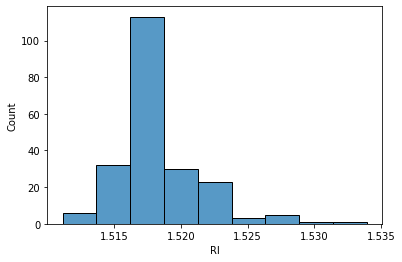

In [9]:
sns.histplot(x=df['RI'],bins=9,palette='Set1')

<AxesSubplot:xlabel='Na', ylabel='Count'>

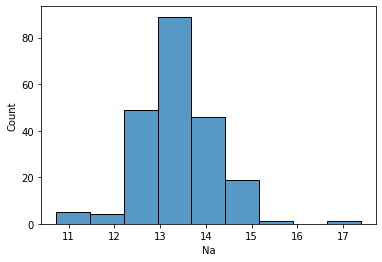

In [10]:
sns.histplot(x=df['Na'],bins=9,palette='Set1')

<AxesSubplot:xlabel='Mg', ylabel='Count'>

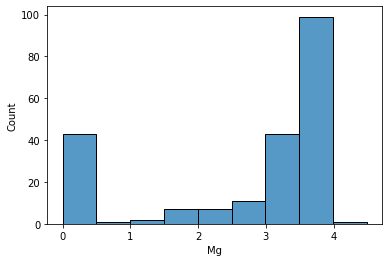

In [11]:
sns.histplot(x=df['Mg'],bins=9,palette='Set1')

C:\Users\Ikenna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

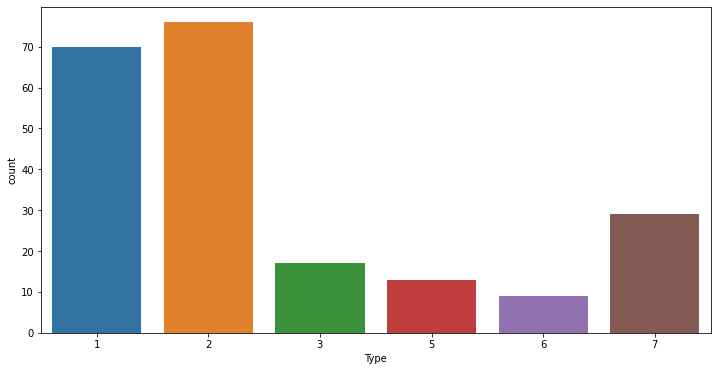

In [12]:
#Plot the target variable.
plt.figure(figsize=(12,6))
sns.countplot(df['Type'])

<AxesSubplot:xlabel='Type', ylabel='RI'>

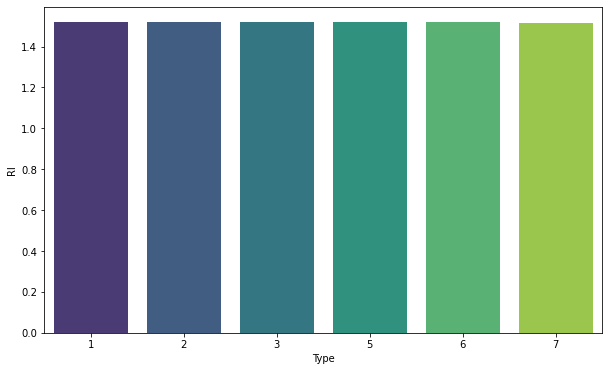

In [13]:
#Determine the relationship between the predictor variable RI and the Target column.
plt.figure(figsize=(10,6))
sns.barplot(x=df['Type'],y=df['RI'],palette='viridis',ci=False)

<AxesSubplot:xlabel='Type', ylabel='Mg'>

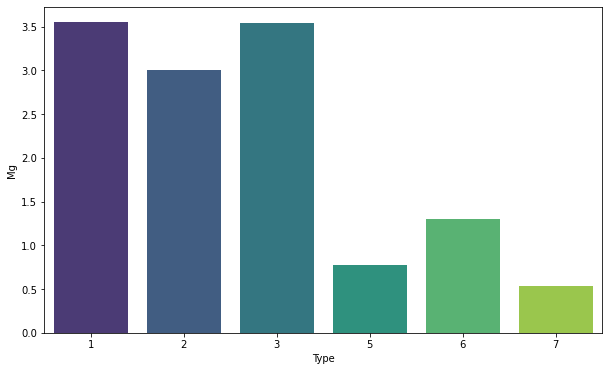

In [14]:
#Determine the relationship between the predictor variable Mg and the Target column.
plt.figure(figsize=(10,6))
sns.barplot(x=df['Type'],y=df['Mg'],palette='viridis',ci=False)

The plots show the effect of the independent variable on the target column. With this information, we can determine which predictors will accurately predict the classes of glasses in our model.

In [15]:
#Get the columns for the data set.
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

### 3.0 Data Correlation

For the data set, find a correlation between the input features and the target column.

In [16]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


<AxesSubplot:>

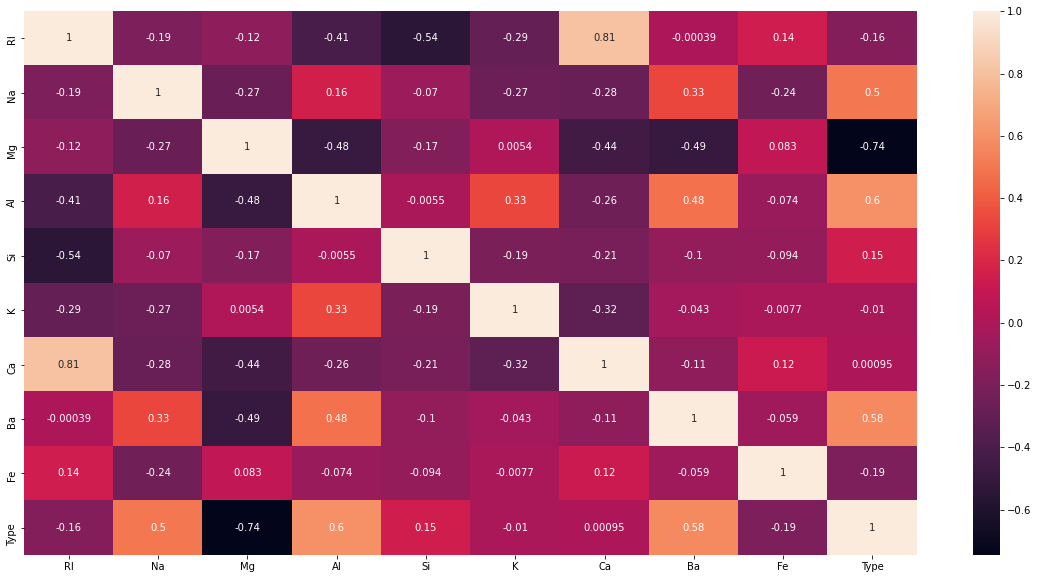

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

According to the heatmap, Ba, Ca, Si, AI, and Na are all positively correlated with Type, but the rest of the inputs are not.

### 4.0 Modeling 

To begin modelling the data, seggregate the data into X and y variables. Where X is the predictor and y is the target feature.

In [18]:
#Remove the column name "Type" from the dataframe and pass it to the variable "X".
X=df.drop('Type',axis=1)

In [19]:
#Set data column Type to y.
y=df['Type']

### 4.1 Data Preprocessing

In [20]:
#Import data preprocessing library.
from sklearn.model_selection import train_test_split

In [21]:
#Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [22]:
#To prepare the data set for modelling, use a conventional scaler algorithm.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### 4.2 Model Development

Model the data using several machine learning techniques such as Random Forest, KNN, etc. to discover which one performs best. I'm just going to try four algorithms for this study.

In [23]:
#Import machine learning algorithm.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
#Get the data into logistics classifier algorithm.
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [25]:
#Get the data into KNN as well.
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
#Same for random forest classifier.
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier()

### 4.3 Model Report

In [28]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [29]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test,y_test)

#### Logistics Regression

Logistics Regression Model
              precision    recall  f1-score   support

           1       0.64      0.56      0.60        16
           2       0.42      0.62      0.50        13
           3       0.00      0.00      0.00         4
           5       1.00      0.50      0.67         2
           6       0.50      0.33      0.40         3
           7       0.80      0.80      0.80         5

    accuracy                           0.53        43
   macro avg       0.56      0.47      0.49        43
weighted avg       0.54      0.53      0.53        43



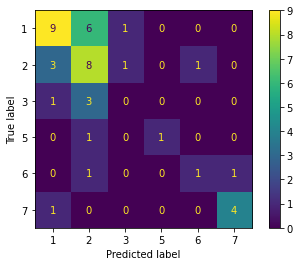

In [30]:
print("Logistics Regression Model")
report(log_model)

#### K-Nearest Neighbour

KNN Classfier Model
              precision    recall  f1-score   support

           1       0.57      0.75      0.65        16
           2       0.50      0.46      0.48        13
           3       0.00      0.00      0.00         4
           5       0.25      0.50      0.33         2
           6       1.00      0.67      0.80         3
           7       1.00      0.80      0.89         5

    accuracy                           0.58        43
   macro avg       0.55      0.53      0.53        43
weighted avg       0.56      0.58      0.56        43



C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ikenna\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


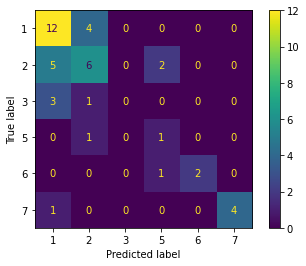

In [31]:
print("KNN Classfier Model")
report(knn_model)

#### Random Forest

Random Forest Classifier Model
              precision    recall  f1-score   support

           1       0.76      0.81      0.79        16
           2       0.73      0.85      0.79        13
           3       1.00      0.25      0.40         4
           5       1.00      1.00      1.00         2
           6       0.75      1.00      0.86         3
           7       1.00      0.80      0.89         5

    accuracy                           0.79        43
   macro avg       0.87      0.78      0.79        43
weighted avg       0.81      0.79      0.78        43



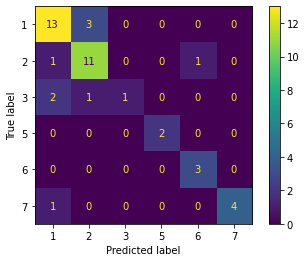

In [32]:
print("Random Forest Classifier Model")
report(rfc_model)

#### Gradient Boosting Classifier

Gradient Boosting Classifier Model
              precision    recall  f1-score   support

           1       0.88      0.88      0.88        16
           2       0.62      0.77      0.69        13
           3       0.50      0.25      0.33         4
           5       0.50      0.50      0.50         2
           6       0.50      0.33      0.40         3
           7       0.60      0.60      0.60         5

    accuracy                           0.70        43
   macro avg       0.60      0.55      0.57        43
weighted avg       0.69      0.70      0.69        43



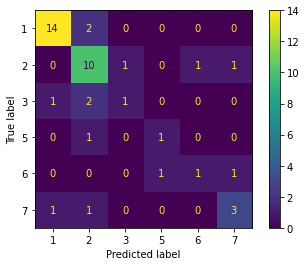

In [33]:
print("Gradient Boosting Classifier Model")
report(gbc_model)

### 5. Conclusion

Based on the performance of the four machine learning algorithms, we can conclude that the Random Forest Classifier outperforms the other techniques in predicting the target dataset with high accuracy. This model can serve as a valuable tool for industries working with the specified glass types, enabling efficient and accurate classification of glass for various applications. To integrate this model into a production environment, it can be deployed as a REST API, allowing seamless access for companies to utilize its predictions. However, before commercial use, the model should undergo thorough validation to ensure reliability and compliance with industry standards.